# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**

# 1. Introduction & Setup

Once again, for this assignment I chose to use a dataset associated with my final project. For this assignment, I selected the [Suspension Data](https://www3.cde.ca.gov/demo-downloads/discipline/suspension22-v2.txt) file from the [California Department of Education website](https://www.cde.ca.gov/ds/ad/downloadabledata.asp).

This dataset looks at the number of suspensions within California schools, broken down by County, District and Schoools. 

#### Import Libraries and setup autosave

One of the things that I've recently began doing is using the magic command to set the autosave feature to every 2-minutes. There have been a number of occassions where the Kernel crashed and I lost all of my data. Therefore, I've begun using autosave to avoid that from happening.

Next I imported the libraries that I will be using for this assignment:

- pandas
- re
- numpy
- matplotlib.pyplot
- seaborn
- rcParams

In [39]:
%autosave 120

import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

Autosaving every 120 seconds


#### Importing Data

When I initially tried to import the data into a dataframe, I received an error indicating that there were some characters that could not be encoded. After doing some research, I learned about the **encoding** paramater of the **read_csv** function, and set it to "ISO-8859-1", which then allowed me to successfully import the data into my Pandas data frame. 

In [2]:
df = pd.read_csv('https://www3.cde.ca.gov/demo-downloads/discipline/suspension22-v2.txt',encoding = "ISO-8859-1", sep='\t')

In order to preserve the original, I made a coopy of the data frame and saved it as **susp_df**

In [62]:
susp_df = df.copy()

# 2. Data Exploration

We start by looking at the shape of the dataframe, and we see that there are 225,535 rows and 21 columns

In [63]:
susp_df.shape

(225353, 21)

Once again, when looking at the columns for the dataframe, we find that the column names are in a format that I don't prefer to work with. This is something that we will change during our Data Wrangling step

In [64]:
susp_df.columns

Index(['AcademicYear', 'AggregateLevel', 'CountyCode', 'DistrictCode',
       'SchoolCode', 'CountyName', 'DistrictName', 'SchoolName', 'CharterYN',
       'ReportingCategory', 'CumulativeEnrollment', 'Total Suspensions',
       'Unduplicated Count of Students Suspended (Total)',
       'Unduplicated Count of Students Suspended (Defiance-Only)',
       'Suspension Rate (Total)', 'Suspension Count Violent Incident (Injury)',
       'Suspension Count Violent Incident (No Injury)',
       'Suspension Count Weapons Possession',
       'Suspension Count Illicit Drug-Related',
       'Suspension Count Defiance-Only', 'Suspension Count Other Reasons'],
      dtype='object')

Finally, similar to our previous assignment, we see that the county code, district code, and school code fields are numeric, when they should be character objects, and the columns from cumulative enrollment on, are coded as character objects, when they should be coded as numeric. This is also something that we will change during our data wrangling process.

In [65]:
susp_df.dtypes

AcademicYear                                                 object
AggregateLevel                                               object
CountyCode                                                    int64
DistrictCode                                                float64
SchoolCode                                                  float64
CountyName                                                   object
DistrictName                                                 object
SchoolName                                                   object
CharterYN                                                    object
ReportingCategory                                            object
CumulativeEnrollment                                         object
Total Suspensions                                            object
Unduplicated Count of Students Suspended (Total)             object
Unduplicated Count of Students Suspended (Defiance-Only)     object
Suspension Rate (Total)                         

# 3. Data Wrangling

Based on our familiarity with this dataset gained from the previous assignment, and by reading the documentation [here](https://www.cde.ca.gov/ds/ad/fssd.asp), we will once again start by completing several key data wrangling steps up front. 

The first thing we will do is convert the column names into a lower_case_with_underscores format, and then secondly we want to filter the data to only include the level of data that we are interested in keeping for our analysis and visualizations. In this case, our final dataframe will be at the School level and include the data for total students (as opposed to the sub categories at each school).

#### a. Rename Columns

Once again, I will begin by converting the column names to lower_case_with_underscores format, by completing the following steps:

1. Create an empty list to store the new column names
2. Create a list of the existing column names and store them in a new list called column_names
3. Next we look through the column names and perform the following operations on each column name using the following steps:
    - For each column name, use regex to break the column name into separate words
    - Next we will convert each of the words in the column name into lower case text and store them into a list
    - We will then combine each of the lower case words in the column names using the underscore symbol
    - Finally, we take our new word and add it to the empty list we created at the onset
4. Finally, now that we have a list of column names, we can set the these column names as the new names for the columns

In [66]:
new_columns = []
column_names = susp_df.columns.to_list()
for column in column_names:
    words = re.findall(r'[A-Z]+[a-z]*',column)
    lower_case_words = [word.lower() for word in words]
    new_column = '_'.join(lower_case_words)
    new_columns.append(new_column)

susp_df.columns = new_columns

#### b. Filter data

Next, we will filter the data to include school level data for a total across each school. We will then take this filtered data and store it in a variable named **schoolLevel_df** 

In [67]:
schoolLevel_df = susp_df[(susp_df['aggregate_level'] == 'S') &
        (susp_df['reporting_category'] == 'TA')]


#### c. Preview data

Once again, we take a peak at the data by using the Pandas' sample function

In [68]:
schoolLevel_df.sample(n=10)

,academic_year,aggregate_level,county_code,district_code,school_code,county_name,district_name,school_name,charter_yn,reporting_category,...,total_suspensions,unduplicated_count_students_suspended_total,unduplicated_count_students_suspended_defiance_only,suspension_rate_total,suspension_count_violent_incident_injury,suspension_count_violent_incident_no_injury,suspension_count_weapons_possession,suspension_count_illicit_drug_related,suspension_count_defiance_only,suspension_count_other_reasons
151967,2021-22,S,34,67421.0,1.0,Sacramento,Robla Elementary,"Nonpublic, Nonsectarian Schools",No,TA,...,0,0,0,0.0,0,0,0,0,0,0
179706,2021-22,S,37,68452.0,6107577.0,San Diego,Vista Unified,Roosevelt Middle,No,TA,...,241,147,37,17.4,120,40,5,17,47,12
171572,2021-22,S,37,73569.0,3739018.0,San Diego,Oceanside Unified,El Camino High,No,TA,...,231,173,3,5.9,58,76,16,73,3,5
102793,2021-22,S,19,64733.0,6057954.0,Los Angeles,Los Angeles Unified,Richard Henry Dana Middle,No,TA,...,1,1,0,0.1,1,0,0,0,0,0
173688,2021-22,S,37,68338.0,108282.0,San Diego,San Diego Unified,Cherokee Point Elementary,No,TA,...,2,2,0,0.7,1,1,0,0,0,0
188180,2021-22,S,41,68866.0,1.0,San Mateo,Belmont-Redwood Shores Elementary,"Nonpublic, Nonsectarian Schools",No,TA,...,0,0,0,0.0,0,0,0,0,0,0
170685,2021-22,S,37,68197.0,132951.0,San Diego,La Mesa-Spring Valley,Trust Blended Learning,No,TA,...,2,2,0,0.4,0,0,0,2,0,0
71484,2021-22,S,15,63479.0,6112791.0,Kern,Fruitvale Elementary,Endeavour Elementary,No,TA,...,2,2,0,0.3,0,2,0,0,0,0
72687,2021-22,S,15,63628.0,1533843.0,Kern,Maricopa Unified,Maricopa High,No,TA,...,69,18,3,17.0,1,38,2,14,10,4
93186,2021-22,S,19,64733.0,6016455.0,Los Angeles,Los Angeles Unified,Chase Street Elementary,No,TA,...,0,0,0,0.0,0,0,0,0,0,0


Next we take a look at the shape of the dataframe as well as the data types for each of our columns

In [69]:
schoolLevel_df.shape

(10652, 21)

In [10]:
schoolLevel_df.dtypes

academic_year                                           object
aggregate_level                                         object
county_code                                              int64
district_code                                          float64
school_code                                            float64
county_name                                             object
district_name                                           object
school_name                                             object
charter_yn                                              object
reporting_category                                      object
cumulative_enrollment                                   object
total_suspensions                                       object
unduplicated_count_students_suspended_total             object
unduplicated_count_students_suspended_defiance_only     object
suspension_rate_total                                   object
suspension_count_violent_incident_injury               

#### d. Convert Columns

We will now work to change the data types for the county_code, district_code, and school_code fields so that they are character objects, and then we will change the data types for the cumulative_enrollment fields on down, so that they are numeric.

We begin by creating a dataframe of just the column names, so we can easily access the columns and their indices for use in our code for converting the data types

In [70]:
pd.DataFrame(schoolLevel_df.dtypes).reset_index().rename(columns={0:'dtype'})

,index,dtype
0,academic_year,object
1,aggregate_level,object
2,county_code,int64
3,district_code,float64
4,school_code,float64
5,county_name,object
6,district_name,object
7,school_name,object
8,charter_yn,object
9,reporting_category,object


Now we perform the datatype conversion

In [71]:
schoolLevel_df.loc[:,10:21]=schoolLevel_df.iloc[:,10:21].apply(lambda x: x.astype(float), axis=1)
schoolLevel_df.loc[:,2:5] = schoolLevel_df.iloc[:,2:5].apply(lambda x: x.astype(int).astype(str), axis=1)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Now we check the data again to confirm that we have the right data types for our fields

In [72]:
schoolLevel_df.dtypes

academic_year                                           object
aggregate_level                                         object
county_code                                             object
district_code                                           object
school_code                                             object
county_name                                             object
district_name                                           object
school_name                                             object
charter_yn                                              object
reporting_category                                      object
cumulative_enrollment                                  float64
total_suspensions                                      float64
unduplicated_count_students_suspended_total            float64
unduplicated_count_students_suspended_defiance_only    float64
suspension_rate_total                                  float64
suspension_count_violent_incident_injury               

#### d. Describe data

In [89]:
schoolLevel_df.describe()

,cumulative_enrollment,total_suspensions,unduplicated_count_students_suspended_total,unduplicated_count_students_suspended_defiance_only,suspension_rate_total,suspension_count_violent_incident_injury,suspension_count_violent_incident_no_injury,suspension_count_weapons_possession,suspension_count_illicit_drug_related,suspension_count_defiance_only,suspension_count_other_reasons
count,10652.000000,10652.000000,10652.000000,10652.000000,10652.000000,10652.000000,10652.000000,10652.000000,10652.000000,10652.000000,10652.000000
mean,614.161472,27.452403,18.566373,1.521780,2.952244,4.264176,13.851483,1.316279,4.737796,2.015115,1.267555
std,648.279384,55.631809,35.315752,7.117071,5.427761,11.633000,28.442849,3.224511,13.237759,11.957709,3.142524
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,498.000000,6.000000,4.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,733.000000,25.000000,18.000000,0.000000,3.600000,3.000000,13.000000,1.000000,2.000000,0.000000,1.000000
max,27369.000000,805.000000,374.000000,224.000000,100.000000,210.000000,353.000000,107.000000,263.000000,587.000000,79.000000


#### e. Preparing data for visualizations

Two visualizations I'm interested in viewing are the relationship between the number of suspensions at a school district compared to the number of schools in the district. To this I grouped the data by the school district and then created aggregate caluclations for the number of schools in the district, the total number of suspensions and the total number of students in the district. The general premise is that larger school districts are mostly found in urban areas, where there are more likely to be a larger number of suspensions.

The second visualization that I was interested in was just an overall distribution of the districts based on the number of schools in each district. This was mainly done to just gain a sense of the data and the overall distribution of the data

In [75]:
suspensions_df = schoolLevel_df.groupby('district_name').aggregate({'school_name':'count', 
                                                                    'total_suspensions':'sum',
                                                                   'cumulative_enrollment':'sum'}).reset_index()

In [77]:
suspensions_df.rename(columns={'school_name':'num_schools'},inplace=True)

In [79]:
suspensions_df['suspension_rate'] = suspensions_df['total_suspensions']/suspensions_df['cumulative_enrollment']

One thing I wanted to do was remove any significantly large districtions from the dataframe in order to remove outliers. I chose 50 as the maximum number of schools in a district and 1000 as the maximum number of suspensions to include in my data.

In [90]:
suspensions_dfMod = suspensions_df[(suspensions_df['num_schools'] <= 50) 
                                  & (suspensions_df['total_suspensions'] <= 1000)]

# 4. Visualizations

Now we can explore our data further by creating visualizations to help us better understand our data. For this assignment, I decided to focus on creating two different visualizations that focus on the following:

**Visualization 1:** For this first visualization, I create a scatter plot that shows the relationship between the number of schools in the district and the total number of suspensions. 

**Visualization 2:** For this second visualization we look at the general distribution of the districts in the data set based on the number of schools that are in the district

### Matplotlib


#### Visualization 1

This visualization is a scatter plot that compares the Number of Schools in the District with the Total Suspensions in the district. For this visualization I made the following customizations to my chart:
    
- Increased the size of the image to 16 x 10
- Changed the market for the points to an x
- Changed the color of the points to purple
- Added a title to the plot
- Changed the font size of the title to 16
- Changed the weight of the title font to bold
- Added labels to the X and Y axis
- Increased the labels to size 14

Text(0, 0.5, 'Total Suspensions')

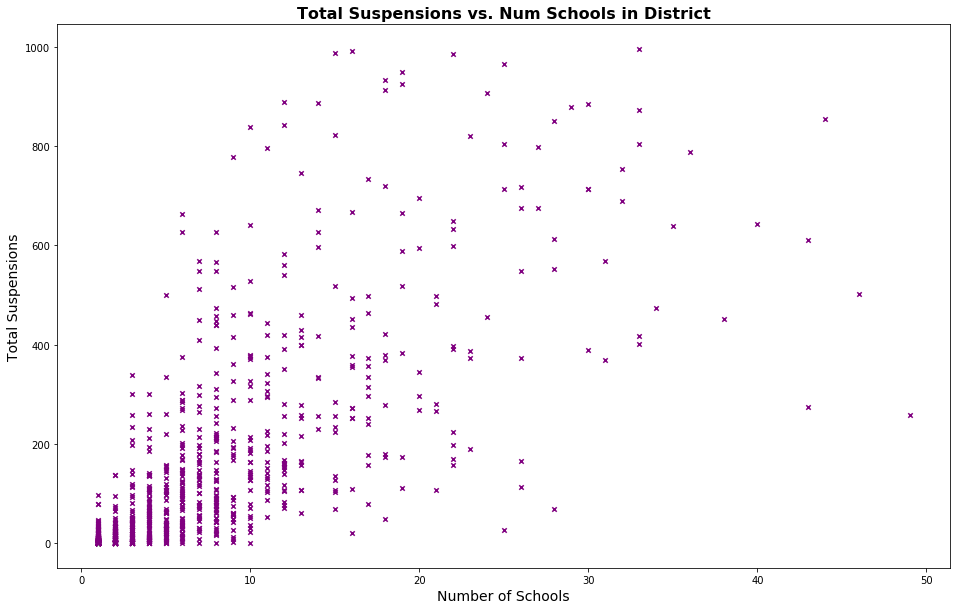

In [88]:
suspensions_dfMod.plot.scatter(x='num_schools', y='total_suspensions',
                              marker='x', color='purple',figsize=(16,10))
plt.title('Total Suspensions vs. Num Schools in District', size=16, fontweight='bold')
plt.xlabel('Number of Schools', size=14)
plt.ylabel('Total Suspensions', size=14)

#### Visualization 2

This visualization is a histogram plot that shows the distribution of districts in the dataset based on the number of Schools in the District. For this visualization I made the following customizations to my chart:
    
- Increased the size of the image to 16 x 10
- Changed the color of the bars to light blue
- Added a black outline border to each of the bars
- Added a title to the plot
- Changed the font size of the title to 16
- Changed the weight of the title font to bold
- Added labels to the X and Y axis
- Increased the labels to size 12

Text(0, 0.5, 'Number of Districts')

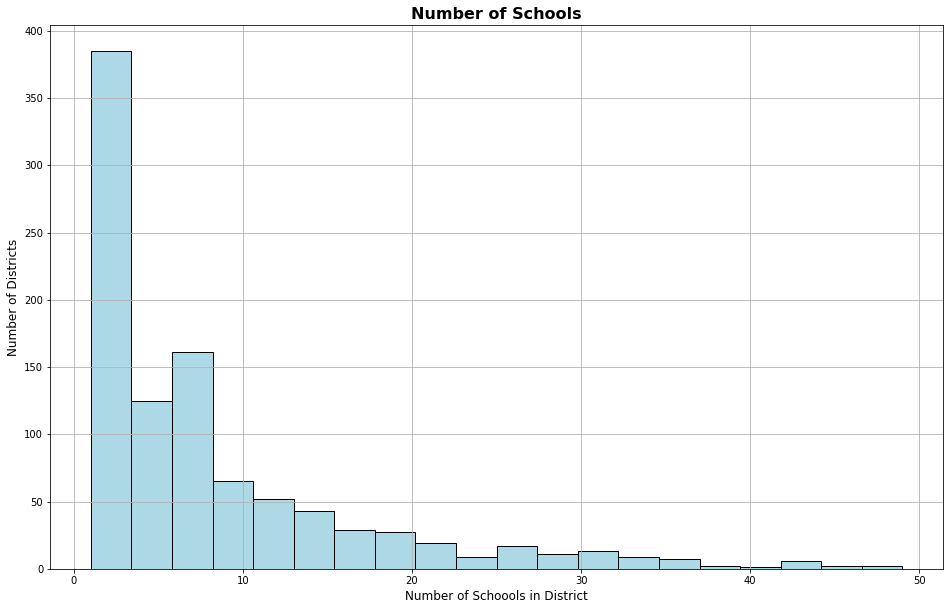

In [38]:
suspensions_dfMod.hist(column='num_schools', bins=20, figsize=(16,10), edgecolor='black',
                      color='lightblue')
plt.title('Number of Schools', size=16, fontweight='bold')
plt.xlabel('Number of Schoools in District', size=12)
plt.ylabel('Number of Districts',size=12)

### Seaborn

Next, I recreated each of the plots above in Seaborn. In addition to the customizations identified above, I had to start by updating the figure size of the image using the rcParams library

In [56]:
rcParams['figure.figsize'] = 16, 10

#### Visualization 1

Text(0, 0.5, 'Total Suspensions')

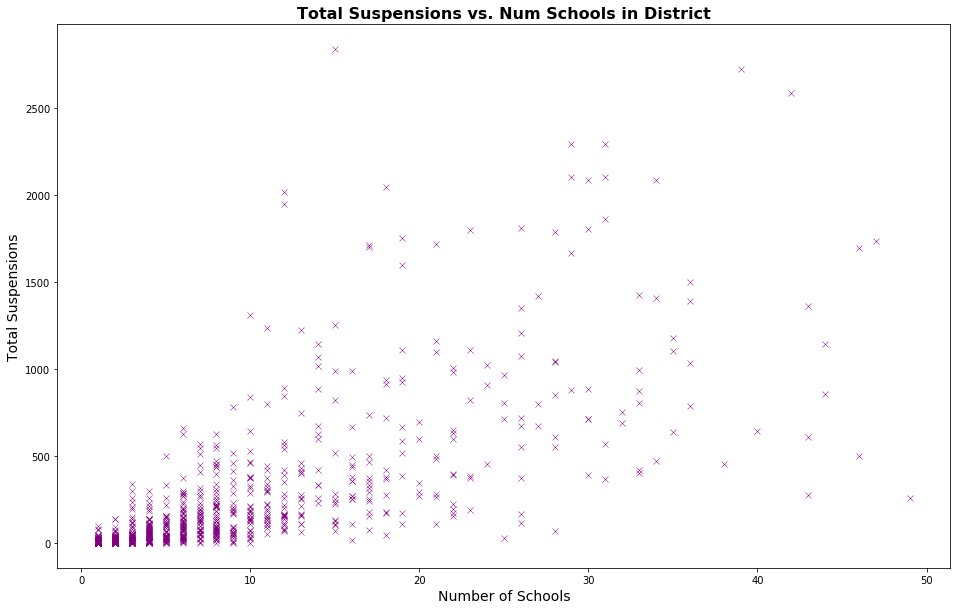

In [57]:
chart = sns.scatterplot(data=suspensions_dfMod, x='num_schools', y='total_suspensions', marker='x',
               color='purple')
plt.title('Total Suspensions vs. Num Schools in District', size=16, fontweight='bold')
plt.xlabel('Number of Schools', size=14)
plt.ylabel('Total Suspensions', size=14)

#### Visualization 2

Text(0, 0.5, 'Number of Districts')

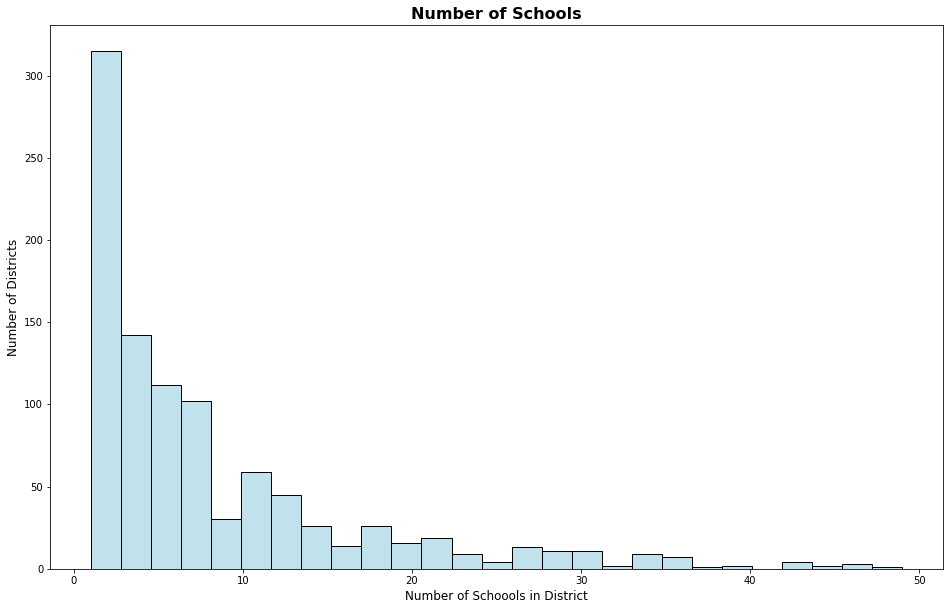

In [58]:
sns.histplot(data=suspensions_dfMod, x='num_schools', color='lightblue')
plt.title('Number of Schools', size=16, fontweight='bold')
plt.xlabel('Number of Schoools in District', size=12)
plt.ylabel('Number of Districts',size=12)

### Matplotlib vs. Seaborn

In this specific instance, I really didn't know a tremendous amount of difference in the process of creating my plots between Matplotblib and Seaborn. I ended up having to add separate lines of code to add titles, labels, and to adjust the size of the plot. However, one thing I noticed is that the Seaborn plot had much better formatting out of the box. I would like to spend more time better understanding each of the graphics libraries so I can master them and have more control over the visualization affects of my data.

# 5. Conclusions  

Through the visualizations, I noticed that there are a lot of districts with only a handful of schools in them across the state. Overall there were only a handful of districts that I would consider larger school districts throughout the state. Being from California, it makes sense to me that this would be the case, since there are a lot of less urban areas throughout the state. 

Additionally, my hypothesis that larger districts would have more total suspensions appears to be somewhat validated by the data. Although the scatter plot does not show a simple linear relationship, we can see the total number of suspensions fanning upward as the number of schools in the distrct increases. 